# Lab 7: Mini Project 3 

## Introduction

In mini-project 3, you'll be working with data related to the Covid-19 pandemic, using various predictors to strategically target vaccine delivery to high risk communities. In this week's Lab and Mini-Project, we will be focusing on **regularization**, a strategy to **prevent over-fitting**.

## Today's Lab: Regularization

Today's lab will use a Bike Sharing Data Set to predict bike rental count (hourly/daily), `cnt` , based on the environmental & seasonal settings. Click [here](https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Bike%20Sharing) for Data Dictionary

We will look at two different types of regularization:
- **Lasso** which shrinks some coefficients towards 0. It is both a form of *feature selection* and a regularization technique! It simplifies the model by dropping out the less informative features and focuses on the most informative predictors
    - *Prevents overfitting primarily through feature selection*
- **Ridge Regression** shrinks coefficients without ever bringing them to zero.
    - *Prevents over-fitting primarily through a penalty that shrinks coefficients to prevent the model from capturing noise*

Click [here](https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Bike%20Sharing) for Data Dictionary


**In This Lab we will:**
1. Load and process data
2. Experiment with Lasso and Ridge Regression
3. Explore how to select an appropriate regularization parameter

**After today's lab you should*
1. Understand the basic differences between Lasso and Ridge Regression
2. Know how to use both Lasso and Ridge regularization techniques in `sci-kit learn`
3. Feel confident in experimenting and selecting an appropriate regularization parameter

**A few things to note**
- *Lasso* is sometimes referred to as L1 regularization
- *Ridge Regression* is sometimes referred to as L2 regularization
- When we are performing regularization we often use a regularization parameter. This tells our model how large of a penalty we want to impose. You may see this value referred to as *alpha* ($\alpha$) or *lambda* ($\lambda$) depending on the text but they mean the same thing.


### Part 1: Load and Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold

#### Read in the CSV

In [2]:
data = pd.read_csv("bike.csv")

In [4]:

print(data.shape)
data.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Tip: Control How Pandas Truncates Columns and Rows using `pd.set_option`

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
print(data.shape)
data.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Set `instant` as the index

In [7]:
data.set_index(['instant'], inplace = True)
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Check for Missing Values

In [8]:
na_count = pd.DataFrame(np.sum(data.isna(), axis = 0), columns = ["Count NAs"])
na_count

,Count NAs
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


*No Missing Values!*

#### Check Data Types

In [9]:
data.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

We have a mix of *integers*, *floats*, and an *object*. 

* Season (1: spring, 2: summer, 3: fall, 4: winter)

* Year (0: 2011, 1:2012)

* Weather Situation (1: Clear, Few clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered  clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets +  Thunderstorm + Mist, Snow + Fog)

* Date (Format: YYYY-MM-DD)

## Part 2: Pre-processing



#### One-Hot Encode Seasons 

First, map the numeric values to their category

In [10]:
seasons = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
data["season"].replace(seasons, inplace=True)
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Then, one hot encode with Pandas Built-in `get_dummies` method
* https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [11]:
data = pd.get_dummies(data, columns = ['season'])
data.head()

,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_Fall,season_Spring,season_Summer,season_Winter
instant,,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0,1,0,0
2,2011-01-01,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0,1,0,0
3,2011-01-01,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0,1,0,0
4,2011-01-01,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0,1,0,0
5,2011-01-01,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0,1,0,0


#### Drop Columns `dteday`, `casual`,`registered`

* `dteday`: relevant info captured in other columns
* `casual`+ `registered` = `cnt` - we don't need this captured twice

In [12]:
data.drop(['dteday', 'casual','registered'], axis=1, inplace=True)

## Part 3: Model Building

Split the features and target:

In [13]:
X = data.copy()
# pop will remove the last element from a list if called without any parameter. 
# It returns the value "popped
y = X.pop('cnt') 

Split our data into testing and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                      random_state=25)

Fit the model on the training set

In [15]:
ols = LinearRegression().fit(X_train, y_train)

Predict on the training set

In [16]:
y_pred_train = ols.predict(X_train)
mse_train_ols = mean_squared_error(y_train, y_pred_train)
print("OLS-Train MSE: ", round(mse_train_ols,2))

OLS-Train MSE:  19682.02


In [17]:
y_pred_test = ols.predict(X_test)
mse_test_ols = mean_squared_error(y_test, y_pred_test)
print("OLS-Test MSE: ", round(mse_test_ols,2))

OLS-Test MSE:  20569.61


## Part 4: Ridge Regression and Lasso

These are regularization techniques that:
- reduces model complexity 
- prevent overfitting 
- adds a penalty for adding too many predictors 

#### Scaling our Features

* Ridge and Lasso regularization are sensitive to the *scale* of the input features.
* Regularization applies a penalty to the coefficients of the input features *based on their scale*

Let's fit with a scaled version of X

In [18]:
from sklearn.linear_model import Ridge

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ridge = Ridge()


#### Choosing a Value of $\alpha$ with GridSearch

An important part of regularization is choosing the correct value of $(\alpha)$. 
- If we choose a value that is too small we might not penalize complexity enough and our model will overfit 
- If we choose a value that is too big we might keep out model from learning important information

One way to choose is by using **grid-search**

In [19]:
alpha_param = np.power(10, (np.linspace(-2, 3, 100)))

#### Setting up some helper functions 

This function to calculate a vector of mean and standard deviation values for each parameter.
* It takes a grid search object which is the result of using scikit-learn's GridSearchCV 
* It also takes and the number of trials which corresponds to the number of *hyperparameter combinations* evaluated during the grid search. In the context of regularization (like Ridge or Lasso), these "trials" correspond to different values of the regularization parameter.
* It then returns vectors with mean and standard deviation values for each train (in this case, regularization parameter)

In [20]:
def vector_values(grid_search, trials):
    '''
    Extracts mean and standard deviation scores from a GridSearchCV object.
    ​
    Parameters
    ----------
    grid_search : GridSearchCV object
    The result of a grid search performed using scikit-learn's GridSearchCV method.
    trials : int
    The number of trials performed during the grid search.
    ​
    Returns
    -------
    mean_vec : ndarray of shape (trials,)
    Array of mean scores, with the negative of each score stored in the array.
    std_vec : ndarray of shape (trials,)
    Array of standard deviation scores.
    '''
    mean_vec = np.zeros(trials)
    std_vec = np.zeros(trials)
    i = 0
    final = grid_search.cv_results_
    
    for mean_score, std_score in zip(final["mean_test_score"], final["std_test_score"]):
        mean_vec[i] = -mean_score
        std_vec[i] = std_score
        i = i+1
    return mean_vec, std_vec

This function highlights the minimum in a Series or DataFrame (general good function to use)

In [21]:
def highlight_min(data, color='yellow'):
    attr = f'background-color: {color}'
    if data.ndim == 1:  # Series
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    return ''

#### Experiment with Ridge GridSearchCV

Below we:
* Define out parameter grid using the parameters defined above
* Initialize the grid search with the ridge estimator
* Perform an exhaustive search, choosing the best model using 10 fold CV and neg_mean_squared_error as our error
* Use our handy function `vector_values` from above to create a dataframe to report our results

In [26]:
#Creating a parameters grid
param_grid = [{
    'alpha': alpha_param
}]

#Running Grid Search over the alpha (regularization) parameter
kf = KFold(n_splits=10, random_state = 25, shuffle=True)
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

# Extract results for all tested alphas
tested_alphas = [params['alpha'] for params in grid_search_ridge.cv_results_['params']]

# Assuming vector_values is properly defined to extract mean and standard deviation values
mean_vec_ridge, std_vec_ridge = vector_values(grid_search_ridge, len(tested_alphas))
results_cv_ridge = pd.DataFrame({'alpha': tested_alphas, 'MSE': mean_vec_ridge})


In [27]:
top_5_results_cv_ridge = results_cv_ridge.sort_values(by='MSE', ascending=True).head(5)

styled_top_5 = top_5_results_cv_ridge.style.apply(highlight_min, subset=['MSE'])
display(styled_top_5)


,alpha,MSE
79,97.700996,19724.897266
80,109.749877,19724.908372
78,86.974900,19724.910157
77,77.426368,19724.941563
81,123.284674,19724.950145


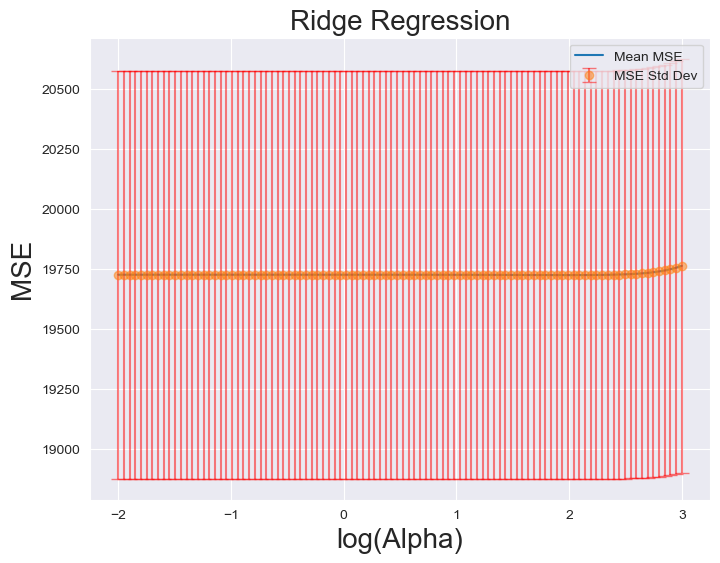

In [28]:
mean_vec, std_vec = vector_values(grid_search_ridge, len(tested_alphas))

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Ridge Regression', fontsize=20)
log_alpha_param = np.log10(alpha_param) # log transform to aid with interpretability of axis
ax.plot(log_alpha_param, mean_vec, label='Mean MSE')
ax.errorbar(log_alpha_param, mean_vec, yerr=std_vec, fmt='o', ecolor='r', capsize=5, alpha=0.5, label='MSE Std Dev')
ax.set_ylabel("MSE", fontsize=20)
ax.set_xlabel("log(Alpha)", fontsize=20)
plt.legend()
plt.show()

*The ideal alpha is often located at the valley of the curve, where the MSE is minimized before it starts to increase again.*

#### We can do something similar for Lasso with GridSearch

This implementation uses a slightly different approach, leveraging the `Pipelines`

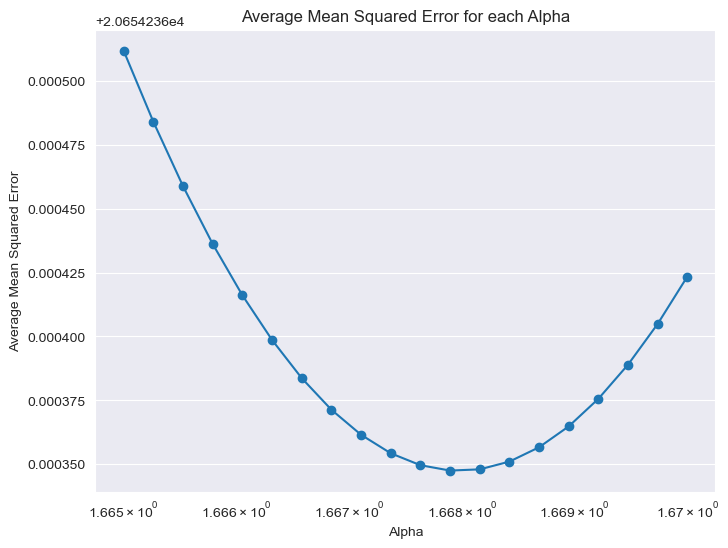

Best alpha: 1.6678947368421053
Best MSE: -20654.23634751441


,params,mean_test_score
0,{'lasso__alpha': 1.665},20654.236512
1,{'lasso__alpha': 1.6652631578947368},20654.236484
2,{'lasso__alpha': 1.6655263157894737},20654.236459
3,{'lasso__alpha': 1.6657894736842105},20654.236436
4,{'lasso__alpha': 1.6660526315789475},20654.236416
5,{'lasso__alpha': 1.6663157894736842},20654.236399
6,{'lasso__alpha': 1.6665789473684212},20654.236384
7,{'lasso__alpha': 1.666842105263158},20654.236371
8,{'lasso__alpha': 1.6671052631578946},20654.236362
9,{'lasso__alpha': 1.6673684210526316},20654.236354


In [38]:
# Defining the range of alpha values to search over
alpha_range = np.linspace(1.665, 1.67, 20)
param_grid = {'lasso__alpha': alpha_range}

# Creating a pipeline and GridSearchCV object
pipeline = make_pipeline(StandardScaler(), Lasso(random_state=1))
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fitting the GridSearchCV object
grid_search.fit(X, y)

# Extract results and convert 'mean_test_score' to positive values
# Note: the term mean_test_score refers to the average mean squared error (MSE) 
# across the cross-validation folds for each alpha value when using GridSearchCV.
results = pd.DataFrame(grid_search.cv_results_)
results['mean_test_score'] = -results['mean_test_score']

# Plotting mean test scores for each alpha value
plt.figure(figsize=(8, 6))
plt.semilogx(alpha_range, results['mean_test_score'], marker='o')
plt.xlabel('Alpha')
plt.ylabel('Average Mean Squared Error')
plt.title('Average Mean Squared Error for each Alpha')
plt.show()

# Getting the best alpha value and corresponding MSE
best_alpha = grid_search.best_params_['lasso__alpha']
best_mse = grid_search.best_score_

print(f"Best alpha: {best_alpha}")
print(f"Best MSE: {best_mse}")

# Applying the highlighting function only to 'mean_test_score' column
results_style = results[['params', 'mean_test_score']].style.apply(
    highlight_min, subset=['mean_test_score'])

results_style